In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"US/Eastern\"")

In [ ]:
hex_project_id = _hex_json.loads("\"4c20c111-0458-4326-8d42-625f2e574ec3\"")

In [ ]:
hex_project_name = _hex_json.loads("\"DTSC_Studio3_Project\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
import geopandas
import scipy.stats as st
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


Below Adds in the incidents for 2011 and drops columns we do not need



In [ ]:
files = ['2012_Incident.csv', '2013_Incident.csv', '2014_Incident.csv', '2015_Incident.csv',
'2012_Incident.csv']
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    incidents_df = pd.concat([df, data], axis=0)

/tmp/ipykernel_1/353350795.py:8: DtypeWarning:

Columns (17,28,29) have mixed types. Specify dtype option on import or set low_memory=False.



Adding weapons data to the incidents data frame to provide another variable

In [ ]:
files = ['2012_Weapons.csv', '2013_Weapons.csv', '2014_Weapons.csv', '2015_Weapons.csv',
'2012_Weapons.csv']
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    weapons_df = pd.concat([df, data], axis=0)

In [ ]:
weapons_df

,Complaint_No,Weapon_Type
0,20120616155200,"Personal Weapons (hands,feet,teeth,etc.)"
1,20120616163800,"Personal Weapons (hands,feet,teeth,etc.)"
2,20120616163800,Other Weapon
3,20120616165800,"Personal Weapons (hands,feet,teeth,etc.)"
4,20120616170401,"Personal Weapons (hands,feet,teeth,etc.)"
...,...,...
24175,20121230194903,Undetermined Firearm
24176,20121230195300,"Personal Weapons (hands,feet,teeth,etc.)"
24177,20121230215101,Other Weapon
24178,20121230222302,"Personal Weapons (hands,feet,teeth,etc.)"


taking away unecessary columns

In [ ]:
incidents_df = incidents_df.drop(
    ["Block_No", "Direction", "Street_Type", "Suffix", "Apt_No", 
    "City", "State", "Division", "Location_Desc", 
    "Incident_From_Date", "Clearance_Date", "Follow_up_Section"], axis=1
)

In [ ]:
incidents_df

,Complaint_No,Street_Name,Zipcode,X_Coordinate,Y_Coordinate,Reported_Date,Location_Type,Incident_From_Time,Incident_to_date,Incident_to_Time,Place1,Place2,Clearance_Status,Case_Status,Reporting_Agency,NIBRS_Hi_Class
0,20120616144301,REAMES,28216,1446430,583618,6/16/12,Indoors,1230,6/16/12,1330.0,Residential,Residential Care Facility ...,Exceptionally Cleared - Located (Missing Perso...,Close/Cleared,Charlotte-Mecklenburg Police Department,Missing Person ...
1,20120616144400,DAVIDSON,28205,1459634,549425,6/16/12,Parking Lot,2200,6/16/12,1230.0,Residential,Apartment/Duplex Private Res ...,Open ...,Further Investigation,Charlotte-Mecklenburg Police Department,Theft of Motor Vehicle Parts from Vehicle ...
2,20120616144700,24TH,28206,1454309,549845,6/16/12,Outdoors,800,NaN,NaN,Commercial Place,Other - Commercial Place ...,Open ...,Inactive,Charlotte-Mecklenburg Police Department,All Other Thefts ...
3,20120616145104,LABORDE,28269,1453368,579593,6/16/12,Outdoors,1500,6/15/12,1635.0,Residential,Private Residence ...,Open ...,Inactive,Charlotte-Mecklenburg Police Department,Damage/Vandalism Of Property ...
4,20120616145201,PRINDLE LAKE,28227,1488226,537239,6/16/12,Indoors,1400,6/16/12,1441.0,Residential,Private Residence ...,Exceptionally Cleared - Victim Chose not to Pr...,Close/Cleared,Charlotte-Mecklenburg Police Department,Intimidation ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133501,20121230230802,BRICKLEBERRY,28262,1481731,577554,12/30/12,Parking Lot,2200,12/30/12,2308.0,Residential,Apartment/Duplex Private Res ...,Open ...,Inactive,Charlotte-Mecklenburg Police Department,Hit And Run (Property Only) ...
133502,20121230231104,FREEDOM,28208,1437290,547419,12/30/12,Indoors,2230,12/30/12,2230.0,Retail,Convenience Store ...,Open ...,Inactive,Charlotte-Mecklenburg Police Department,Shoplifting ...
133503,20121230232000,6TH,28202,1450944,542525,12/30/12,Parking Deck,2320,NaN,NaN,Commercial Place,Other - Commercial Place ...,Normal Clearance - Cleared by Arrest ...,Close/Cleared,Charlotte-Mecklenburg Police Department,Drug Equipment Violations ...
133504,20121230232104,YATESWOOD,28212,1482035,532479,12/30/12,Parking Lot,2321,NaN,NaN,Residential,Apartment/Duplex Private Res ...,Normal Clearance - Cleared by Arrest ...,Close/Cleared,Charlotte-Mecklenburg Police Department,Stolen Property Offenses ...


This adds in the weapons descriptions and then matches it to incidents



In [ ]:
incident = pd.merge(incidents_df, weapons_df, on="Complaint_No")


In [ ]:
incident.index = [x for x in range(1, len(incident.values)+1)]
incident.index.name = 'id'

In [ ]:
#Replacing empty values with NaN
incident = incident.replace(r'^\s+$', np.nan, regex=True)

In [ ]:
#Getting month and year in own columns
incident["month"] = pd.to_datetime(incident["Reported_Date"]).dt.month
incident["year"] = pd.to_datetime(incident["Reported_Date"]).dt.year
incident

,Complaint_No,Street_Name,Zipcode,X_Coordinate,Y_Coordinate,Reported_Date,Location_Type,Incident_From_Time,Incident_to_date,Incident_to_Time,Place1,Place2,Clearance_Status,Case_Status,Reporting_Agency,NIBRS_Hi_Class,Weapon_Type,month,year
id,,,,,,,,,,,,,,,,,,,
1,20120616155200,COLLEGE,28202,1450860,542997,6/16/12,Indoors,2300,6/7/12,2330.0,Commercial Place,Other - Commercial Place ...,Exceptionally Cleared - Cleared by Other Means...,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault ...,"Personal Weapons (hands,feet,teeth,etc.)",6,2012
2,20120616155200,COLLEGE,28202,1450860,542997,6/16/12,Indoors,2300,6/7/12,2330.0,Commercial Place,Other - Commercial Place ...,Exceptionally Cleared - Cleared by Other Means...,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault ...,"Personal Weapons (hands,feet,teeth,etc.)",6,2012
3,20120616155200,COLLEGE,28202,1450860,542997,6/16/12,Indoors,2300,6/7/12,2330.0,Commercial Place,Other - Commercial Place ...,Exceptionally Cleared - Cleared by Other Means...,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault ...,"Personal Weapons (hands,feet,teeth,etc.)",6,2012
4,20120616155200,COLLEGE,28202,1450860,542997,6/16/12,Indoors,2300,6/7/12,2330.0,Commercial Place,Other - Commercial Place ...,Exceptionally Cleared - Cleared by Other Means...,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault ...,"Personal Weapons (hands,feet,teeth,etc.)",6,2012
5,20120616163800,MENDHAM,28215,1478904,546589,6/16/12,Indoors,1635,NaN,NaN,Residential,Apartment/Duplex Private Res ...,Normal Clearance - Cleared by Arrest ...,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault ...,"Personal Weapons (hands,feet,teeth,etc.)",6,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40870,20121230222302,EASTCREST,28205,1464286,538659,12/30/12,Indoors,2223,NaN,NaN,Residential,Apartment/Duplex Private Res ...,Open ...,Further Investigation,Charlotte-Mecklenburg Police Department,Simple Assault ...,"Personal Weapons (hands,feet,teeth,etc.)",12,2012
40871,20121230224901,W T HARRIS,28212,NaN,NaN,12/30/12,Indoors,1800,12/30/12,2249.0,Residential,Apartment/Duplex Private Res ...,Unfounded ...,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault ...,Unknown/Not Stated,12,2012
40872,20121230224901,W T HARRIS,28212,NaN,NaN,12/30/12,Indoors,1800,12/30/12,2249.0,Residential,Apartment/Duplex Private Res ...,Unfounded ...,Close/Cleared,Charlotte-Mecklenburg Police Department,Simple Assault ...,Unknown/Not Stated,12,2012


In [ ]:
#Turning months into seasons
#1 = Winter 
#2 = spring 
#3 = Summer 
#4= Fall
seasons = {(1, 12, 2): 1, (3, 4, 5): 2, 
            (6, 7, 8): 3, 
            (9, 10, 11): 4
            }
incident["season"] = incident["month"].astype(int).replace(seasons)

In [ ]:
incident = incident[
    (incident["Weapon_Type"] != "Unknown/Not Stated")
    & (incident["Weapon_Type"].notnull())
]

In [ ]:
incident['NIBRS_Hi_Class'].value_counts()

Simple Assault                                                                                          23612
Aggravated Assault                                                                                       7481
Robbery                                                                                                  5448
Weapon Law Violations                                                                                    1352
All Other Thefts                                                                                          639
Drug/Narcotic Violations                                                                                  451
Drug Equipment Violations                                                                                 281
Forcible Rape                                                                                             276
Shoplifting                                                                                               237
Forcible F

Correlation Among variables in the data set

In [ ]:
# incident['NIBRS_Hi_Class_Label'] = pd.Categorical(incident["NIBRS_Hi_Class"]).codes
incident['Weapon_Type_Label'] = pd.Categorical(incident["Weapon_Type"]).codes
incident.corr().unstack().sort_values().drop_duplicates()

/tmp/ipykernel_1/1745440614.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Incident_to_Time     month                 -0.002735
Complaint_No         Incident_to_Time      -0.002022
season               Weapon_Type_Label     -0.000791
Complaint_No         Weapon_Type_Label      0.002001
Weapon_Type_Label    month                  0.002414
season               Incident_to_Time       0.003813
 Incident_From_Time  month                  0.005695
                     Complaint_No           0.006202
Weapon_Type_Label     Incident_From_Time    0.007276
 Incident_From_Time  season                 0.016878
Incident_to_Time     Weapon_Type_Label      0.024889
month                season                 0.343401
season               Complaint_No           0.344201
Incident_to_Time      Incident_From_Time    0.853670
Complaint_No         month                  0.999536
                     Complaint_No           1.000000
                     year                        NaN
dtype: float64

/tmp/ipykernel_1/410823410.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

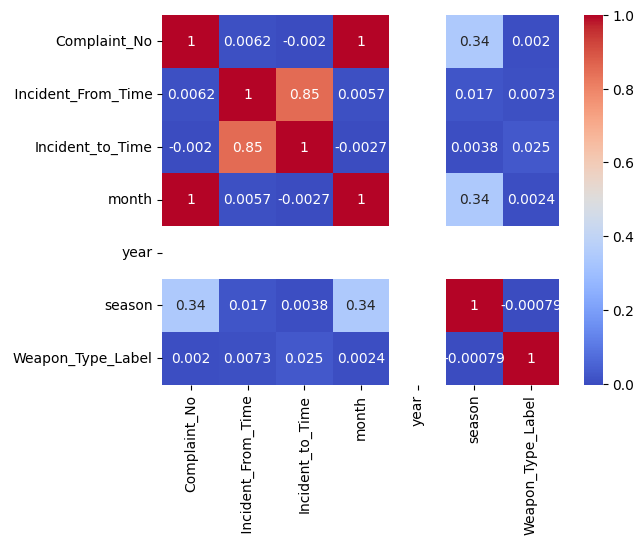

In [ ]:
sns.heatmap(incident.corr(), cmap="coolwarm", annot=True)

Visualizations beofre some data correction to get rid of the personal weapons to show that there is no distribution change among any of the variables

<AxesSubplot: >

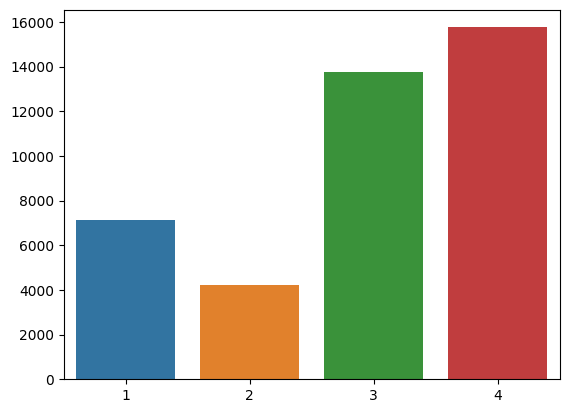

In [ ]:
season_counts = incident["season"].value_counts()
sns.barplot(x=season_counts.index, y=season_counts.values)

<AxesSubplot: >

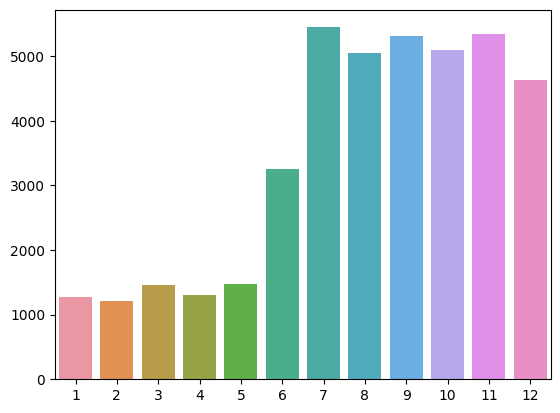

In [ ]:
month_counts = incident["month"].value_counts()
sns.barplot(x=month_counts.index, y=month_counts.values)

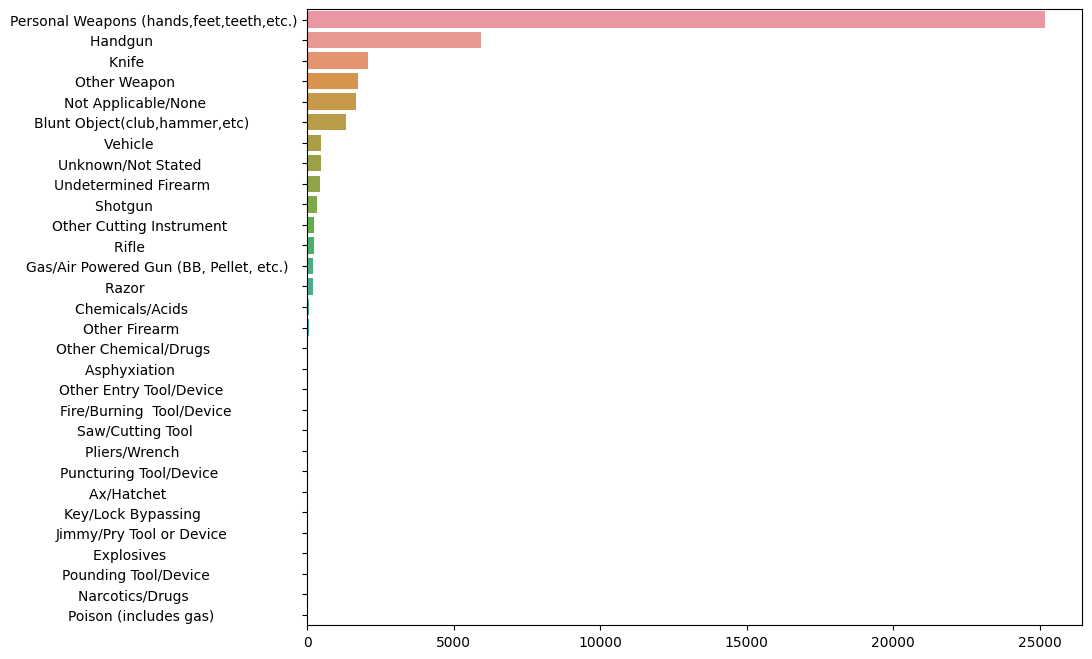

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
weapon_counts = incident["Weapon_Type"].value_counts()
g = sns.barplot(x=weapon_counts.values, y=weapon_counts.index, orient="h")

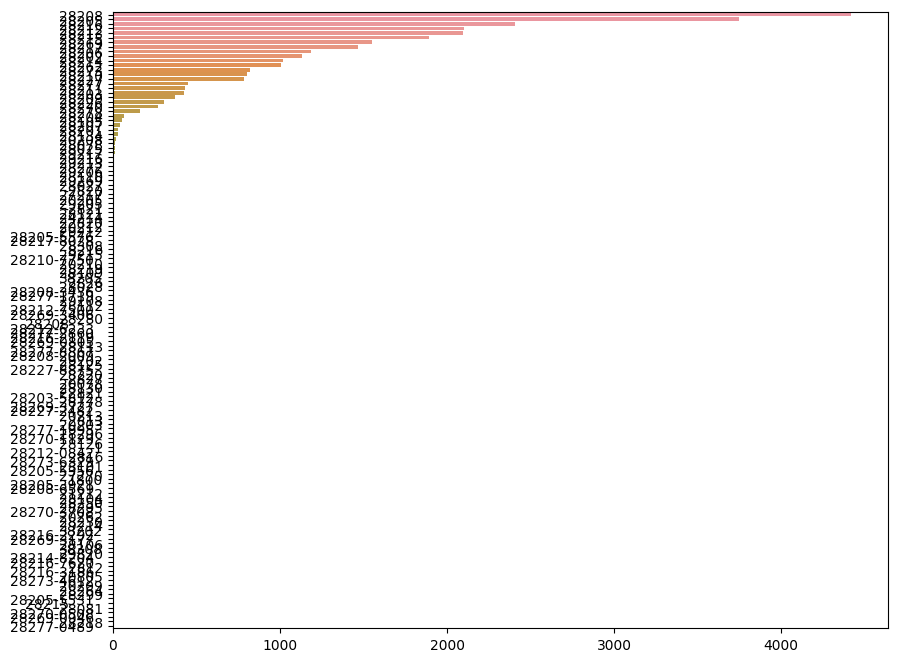

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
zip_counts = incident["Zipcode"].value_counts()
g = sns.barplot(x=zip_counts.values, y=zip_counts.index, orient="h")

While also unadding the personal weapon possibility we had to remove all the zipcodes that were not actual representations of clt zipcodes

In [ ]:
#Above we saw some issues in the graphs with major outliers and uncesssary values so this takes care of that
incident = incident[incident.groupby("Zipcode")["Zipcode"].transform("count") > 10]
incident = incident[
    incident["Weapon_Type"] != "Personal Weapons (hands,feet,teeth,etc.)"
]
incident = incident[incident.groupby("Weapon_Type")["Weapon_Type"].transform("count") > 50]


Graphs with the corrections made as you can see their is no distribution change with the other variables such as season.

Text(0.5, 1.0, 'Zipcode Incident Counts')

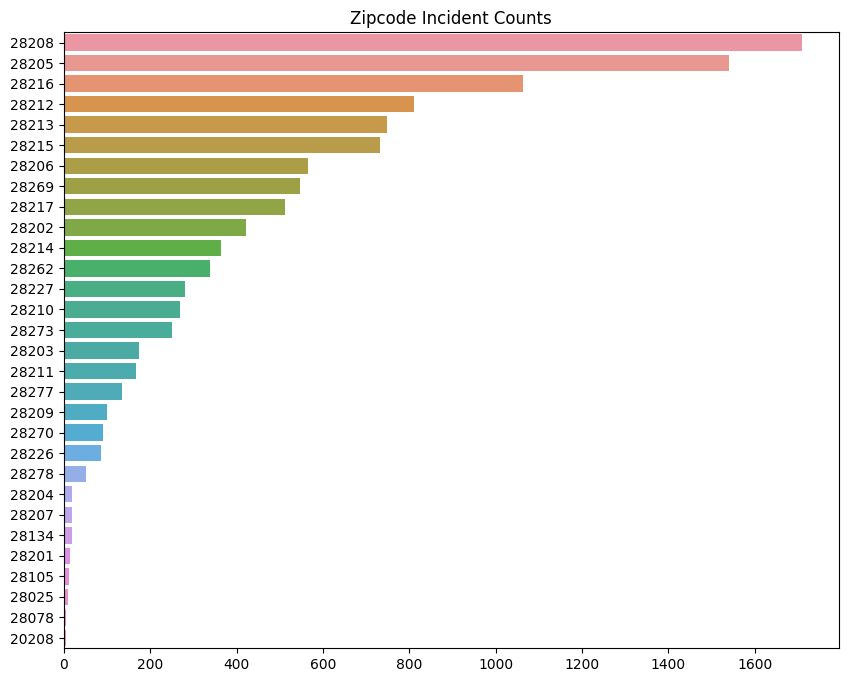

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
zip_counts = incident["Zipcode"].value_counts()
g = sns.barplot(x=zip_counts.values, y=zip_counts.index, orient="h")
plt.title('Zipcode Incident Counts')


Text(0.5, 1.0, 'Season Incident Counts')

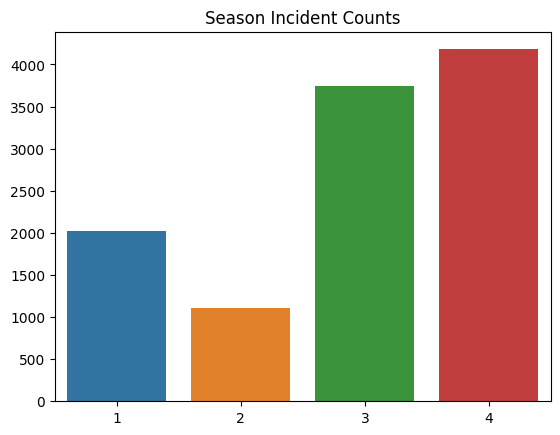

In [ ]:
season_counts = incident["season"].value_counts()
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('Season Incident Counts')

Text(0.5, 1.0, 'Month Incident Counts')

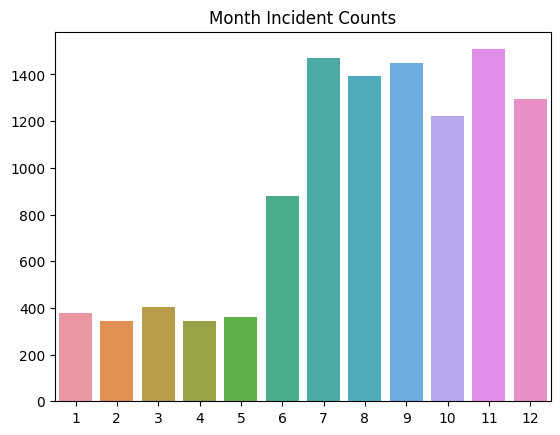

In [ ]:
month_counts = incident["month"].value_counts()
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Month Incident Counts')

Text(0.5, 1.0, 'Weapon Counts')

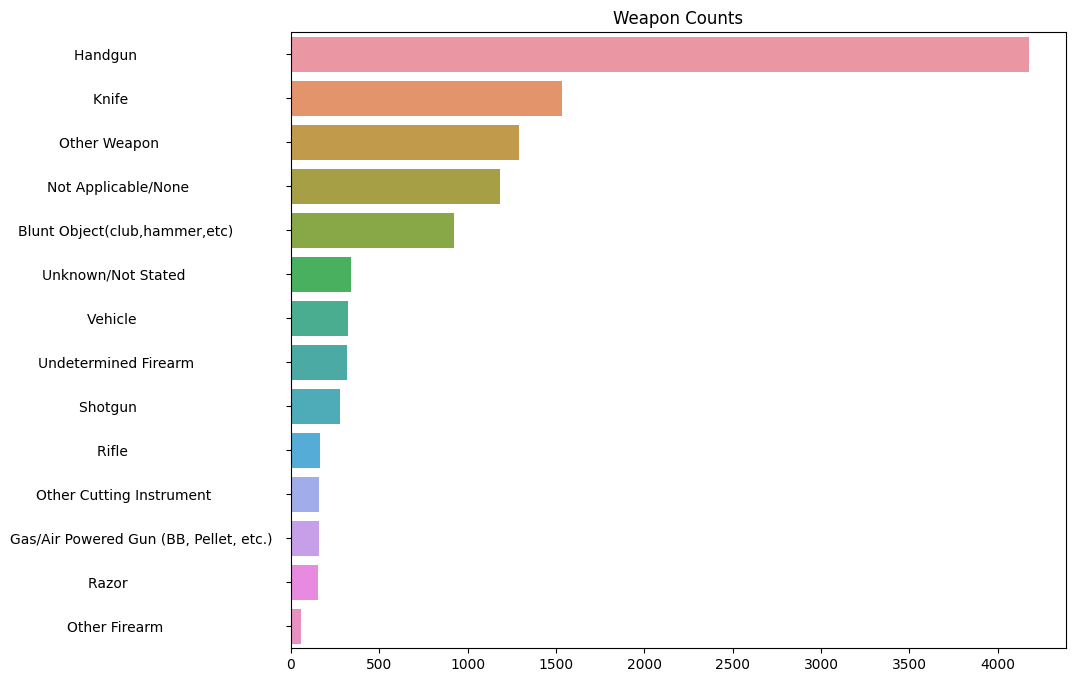

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
weapon_counts = incident["Weapon_Type"].value_counts()
g = sns.barplot(x=weapon_counts.values, y=weapon_counts.index, orient="h")
plt.title("Weapon Counts")

Target variable - Incident location. We operationalized incident location by utilizing zip codes.
Predictor Variables - Weapon type, Crime description, & season. We're noticing, for crime description specifically that we may want to drop personal weapons. Simple personal weapon assaults seem to be included in a lot of crimes that don't pertain to the original scope of our project.
Categorical fields - All of our fields are categorical. They give us multiple perspectives to make predictions regarding incident location. We are still processing which variables will be most useful in our model.




In [ ]:
zip_counts = incident[["Weapon_Type", "season"]].value_counts()
zip_counts

Weapon_Type                               season
Handgun                                   4         1552
                                          3         1502
                                          1          734
Knife                                     4          632
Other Weapon                              4          496
Not Applicable/None                       4          440
Knife                                     3          411
Not Applicable/None                       3          409
Other Weapon                              3          396
Handgun                                   2          389
Blunt Object(club,hammer,etc)             3          364
Knife                                     1          337
Blunt Object(club,hammer,etc)             4          336
Other Weapon                              1          249
Not Applicable/None                       1          185
Other Weapon                              2          151
Knife                                  

Text(0.5, 1.0, 'Weapon Counts')

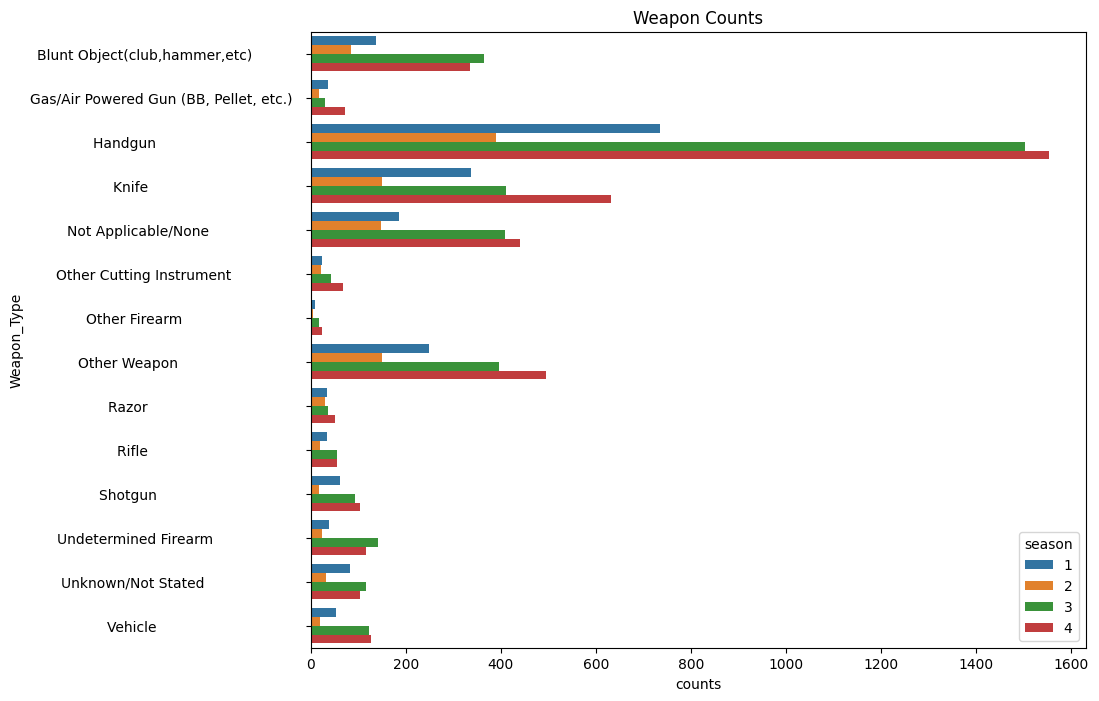

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
weapon_counts = (
    incident.groupby(["Weapon_Type", "season"]).size().reset_index(name="counts")
)
g = sns.barplot(
    x="counts", y="Weapon_Type", hue="season", data=weapon_counts, orient="h"
)
plt.title("Weapon Counts")

As seen above by taking away the personal weapons since we want to look at weapons does nto actually affect the distribution of any variable hardly at all.



In [ ]:
incident.shape

(11052, 21)

Adding Census data to the data set for median income

In [ ]:
# census = pd.read_csv("ACSST5Y2015.S1903-Data.csv")
# census["GEO_ID"] = census["GEO_ID"].str.replace("8600000US", "")
# census = census[["GEO_ID", "S1903_C02_001E"]]
# census = census.rename({'GEO_ID': 'Zipcode', 'S1903_C02_001E': 'Median_Income' }, axis=1)
# incident = pd.merge(incident, census, on='Zipcode')
# incident

Splitting our data into a test and train data set for the model and to get our baseline

In [ ]:
#Rebalancing had to be changed to before because of dummy variables
incident["Weapon_Type"] = incident["Weapon_Type"].astype(str)
incident["Weapon_Type"] = incident["Weapon_Type"].str.strip()
# to_resample = incident.loc[incident['Weapon_Type'].isin(['Knife', 'Blunt Object(club,hammer,etc)', 
#                 'Undetermined Firearm', 'Vehicle', 'Shotgun', 'Gas/Air Powered Gun (BB, Pellet, etc.)',
#                 'Other Cutting Instrument', 'Razor', 'Rifle'])]
to_resample = incident.loc[incident['Weapon_Type'] == 'Handgun']
# our_resample = to_resample.sample(n=8000, replace=True)
our_resample = resample(to_resample, replace=True, n_samples=2000)
incident_rebal = pd.concat([incident, our_resample])

In [ ]:
#Splitting the data for training 
incident = incident[["Weapon_Type", "season", "NIBRS_Hi_Class", "Zipcode"]]
incident  = pd.get_dummies(incident, columns=['Weapon_Type','NIBRS_Hi_Class'], prefix = ['dummy','dummy'])
incident_train1, incident_test1 = train_test_split(incident, test_size =0.25, random_state = 7)
print(incident_test1.shape)
print(incident_train1.shape)
incident_train1['Zipcode'].value_counts()
incident_corr = incident.corr().unstack().sort_values().drop_duplicates()


(2763, 45)
(8289, 45)
/tmp/ipykernel_1/1952584500.py:11: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
print(incident_corr)

dummy_Robbery                                                                                               dummy_Aggravated Assault                                                                                     -0.452066
dummy_Simple Assault                                                                                        dummy_Aggravated Assault                                                                                     -0.371847
                                                                                                            dummy_Handgun                                                                                                -0.351905
dummy_Knife                                                                                                 dummy_Handgun                                                                                                -0.312566
dummy_Other Weapon                                                                          

had to fix the weapon_type column since it was being viewed as a object then the string version had multiple spaces after the word would have ended

In [ ]:
#Code below worked before having dummy variables but adding them took away the variable used for this but it is not vital to the projhect

In [ ]:
# incident_train1["Weapon_Type"] = incident_train1["Weapon_Type"].astype(str)
# incident_train1["Weapon_Type"] = incident_train1["Weapon_Type"].str.strip()

In [ ]:
# incident_train1["Weapon_Type"].value_counts()

Resampling our data since handgun has a much higher representation in the data set. To keep the distribution tru we thought it would be best to split a resample among all the underrepresented variables since the distribution represents the higher chance of a handgun crime

In [ ]:
# to_resample = incident_train1.loc[incident_train1['Weapon_Type'].isin(['Knife', 'Blunt Object(club,hammer,etc)', 
#                 'Undetermined Firearm', 'Vehicle', 'Shotgun', 'Gas/Air Powered Gun (BB, Pellet, etc.)',
#                 'Other Cutting Instrument', 'Razor', 'Rifle'])]
# our_resample = to_resample.sample(n=8000, replace=True)
# incident_train_rebal = pd.concat([incident_train1, our_resample])
# incident_train_rebal["Weapon_Type"].value_counts()

In [ ]:
# incident_train_rebal

Below is our baseline for each zipcode with the highest being about 15%

In [ ]:
# incident_train_rebal["Zipcode"].value_counts(normalize=True)


How many partitions will you use to evaluate your model? 
    (**We used two partitions of a training set and a testing set**)

What are the parameters you used for creating these partitions?
    (**We made a 80/20 split since we have a decently large data set we thought more for training would provide us better results.**) 

How are you going to validate the data partition?
    (**By rebalancing the data and then testing our baseline to see where we are at for predictions of each possible prediction.**)

Does the training set need to be balanced?
    (**Yes it did need to be balance since the handgun weapon was used far more tehn anyother crim so it had some overepresentation in the data but to keep the distribution the same to maintain consistency I evenly distributed the resample across the otehr types of weapons.**)

What is your baseline model? 
    (**Our baseline prediction is at around 15%**)

How well does your baseline model predict your target?
    (**For classification or decision tree it seems like it will be fine. Since we have 15 possibe values that cna be predicted this percentage is not all that awful.**)

Start of modeling

In [ ]:
y = incident_train1["Zipcode"]
incident_train1 = incident_train1.drop("Zipcode", axis=1)
x = incident_train1

y_test = incident_test1["Zipcode"]
incident_test1 = incident_test1.drop("Zipcode", axis=1)
x_test = incident_test1
x

,season,"dummy_Blunt Object(club,hammer,etc)","dummy_Gas/Air Powered Gun (BB, Pellet, etc.)",dummy_Handgun,dummy_Knife,dummy_Not Applicable/None,dummy_Other Cutting Instrument,dummy_Other Firearm,dummy_Other Weapon,dummy_Razor,...,dummy_Pocket-Picking,dummy_Prostitution,dummy_Robbery,dummy_Sexual Assault With Object,dummy_Shoplifting,dummy_Simple Assault,dummy_Statutory Rape,dummy_Stolen Property Offenses,dummy_Theft From Motor Vehicle,dummy_Weapon Law Violations
id,,,,,,,,,,,,,,,,,,,,,
12479,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40580,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
37746,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9299,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29280,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15657,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20791,4,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
39597,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Fitting the models
cart01 = DecisionTreeClassifier(max_leaf_nodes=15).fit(x,y)
#c50_01 = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000).fit(x,y)
c50_01 = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=15).fit(x,y)
rf01 = RandomForestClassifier(n_estimators = 15,criterion="gini").fit(x,y)

In [ ]:
prediction_cart01 = cart01.predict(x)
prediction_c50_01 = c50_01.predict(x)
prediction_rf01 = rf01.predict(x)
print(cart01.score(x,y))
print(c50_01.score(x,y))
print(rf01.score(x,y))

0.1725177946676318
0.17203522740982025
0.2428519724936663


In [ ]:
prediction_cart01 = cart01.predict(x_test)
prediction_c50_01 = c50_01.predict(x_test)
prediction_rf01 = rf01.predict(x_test)
print(cart01.score(x_test,y_test))
print(c50_01.score(x_test,y_test))
print(rf01.score(x_test,y_test))

0.16865725660513933
0.16648570394498732
0.20304017372421282


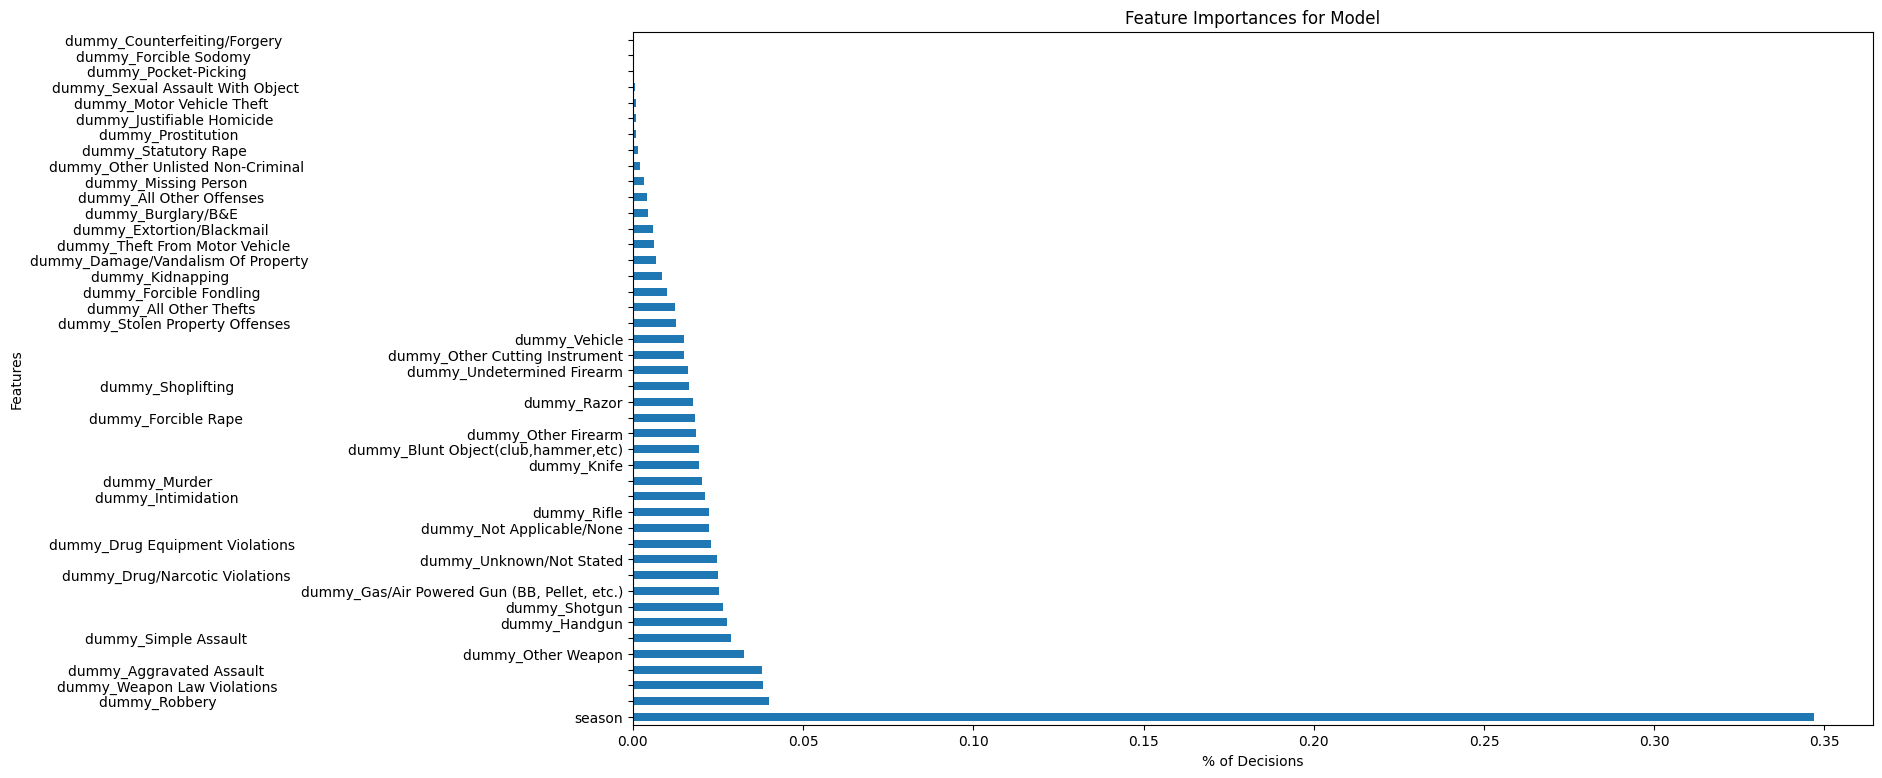

In [ ]:
feature_importances = pd.Series(rf01.feature_importances_, index=x_test.columns)
feature_importances.sort_values(ascending=False).plot(kind="barh", figsize=(16, 9))
plt.xlabel("% of Decisions")
plt.ylabel("Features")
plt.title("Feature Importances for Model")
plt.show()

In [ ]:
y_test["values"] = pd.Categorical(y_test).codes

In [ ]:
y["values"] = pd.Categorical(y).codes


/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/hexuser/.cache/pypoetry/virtualenvs/python-ker

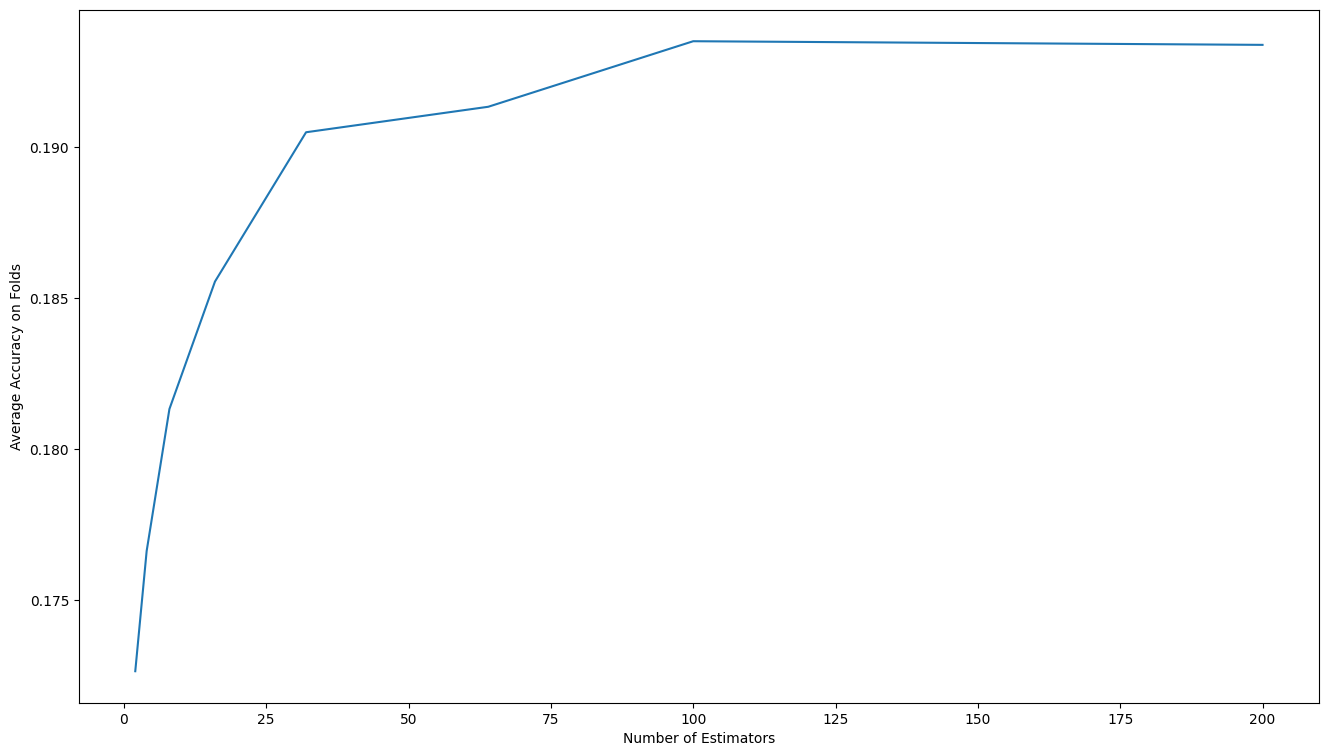

In [ ]:
from sklearn.model_selection import cross_val_score

n_estimators = [2, 4, 8, 16, 32, 64, 100, 200]
estimator_acc = []

# Looping through the number of estimators and finding the best
for estimator in n_estimators:
    model = XGBClassifier(random_state=34, n_estimators=estimator)

    accuracies = cross_val_score(model, X=x, y=y["values"], cv=5)

    estimator_acc.append(np.mean(accuracies))

plt.figure(figsize=(16, 9))
plt.plot(n_estimators, estimator_acc)
plt.xlabel("Number of Estimators")
plt.ylabel("Average Accuracy on Folds")
plt.show()

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/hexuser/.cache/pypoetry/virtualenvs/python-ker

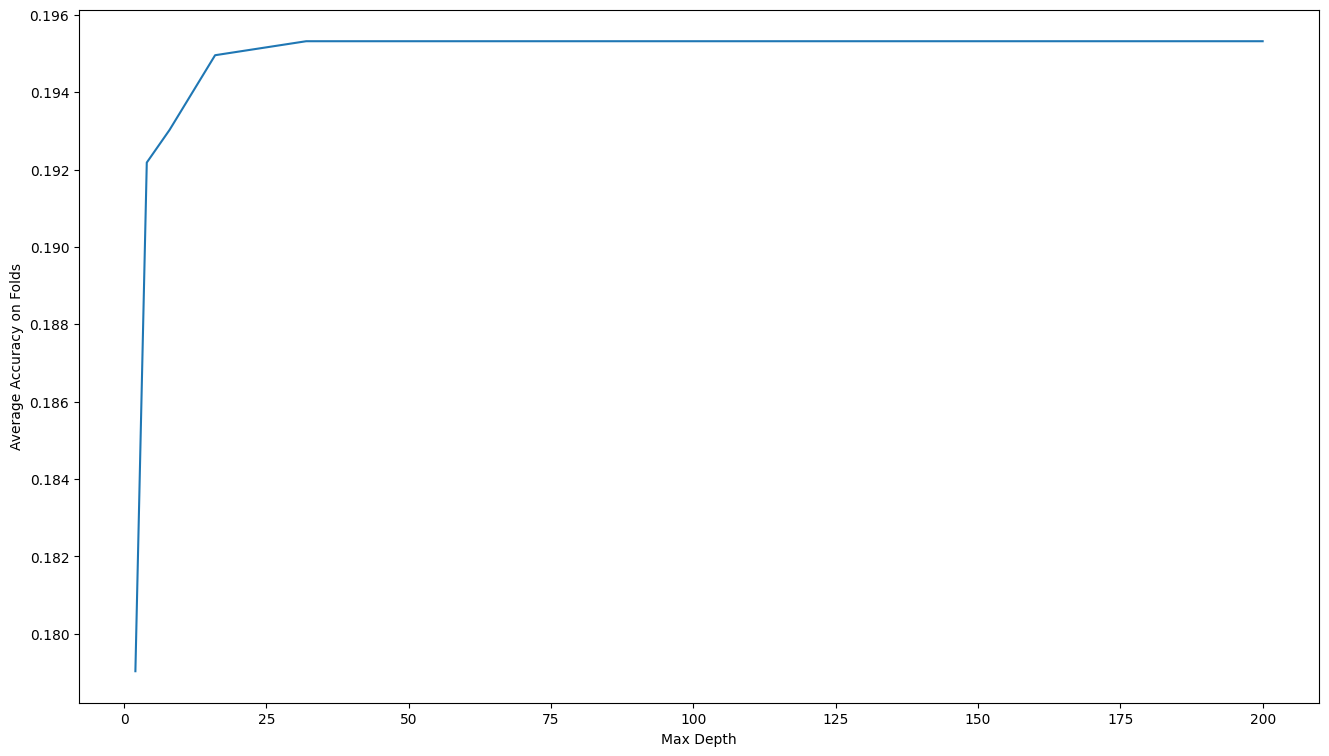

In [ ]:
max_depths = [2,4,8,16,32,64,100,200]
depth_acc = []
#Looping through the number of estimators and finding the best
for depth in max_depths:
  model = XGBClassifier(random_state=34,n_estimators=100,max_depth = depth)

  accuracies = cross_val_score(model,X=x,y=y['values'],cv=5)

  depth_acc.append(np.mean(accuracies))

plt.figure(figsize=(16,9))
plt.plot(max_depths,depth_acc)
plt.xlabel('Max Depth')
plt.ylabel('Average Accuracy on Folds')
plt.show()

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/hexuser/.cache/pypoetry/virtualenvs/python-ker

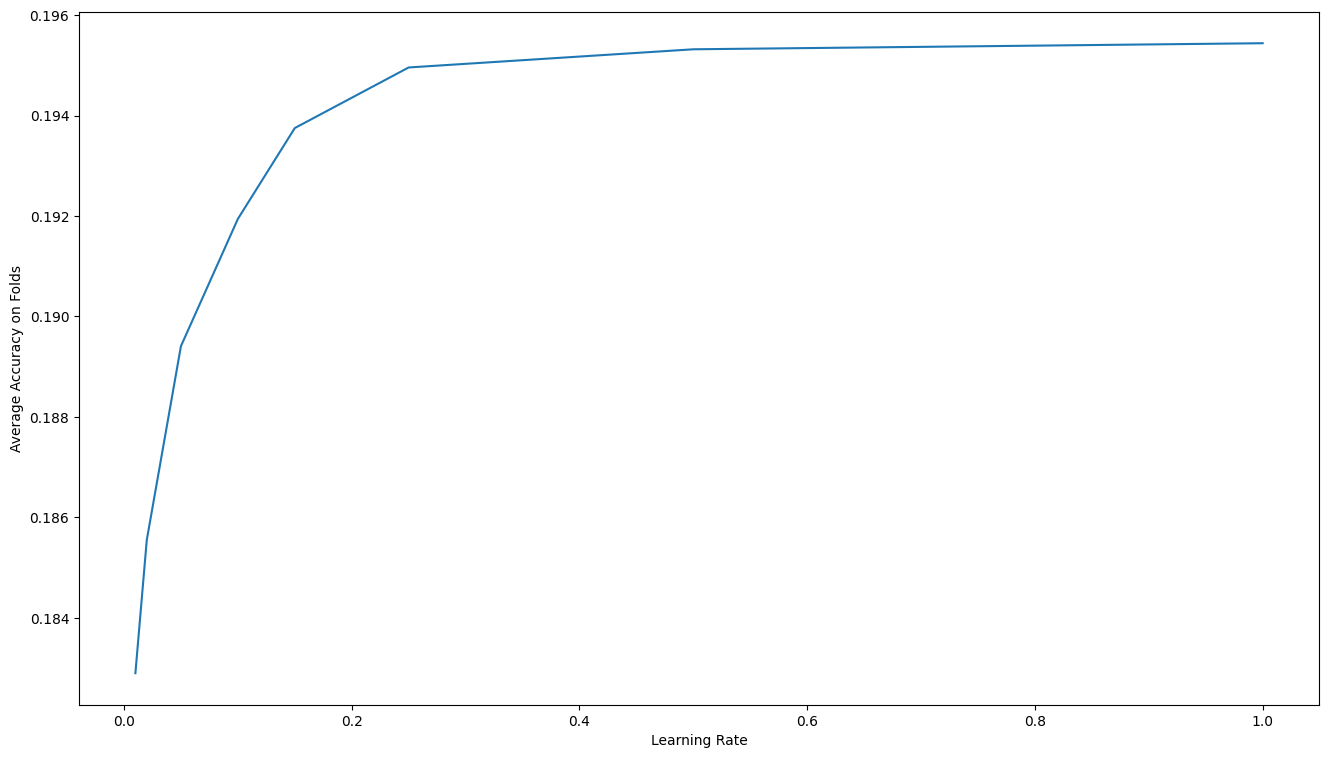

In [ ]:
learning_rates = [.01,.02,.05,.1,.15,.25,.5,1]
rate_acc = []
#Looping through the number of estimators and finding the best
for rate in learning_rates:
  model = XGBClassifier(random_state=34, n_estimators = 100, learning_rate=rate,
                        max_depth=50)

  accuracies = cross_val_score(model,X=x,y=y['values'],cv=5)

  rate_acc.append(np.mean(accuracies))

plt.figure(figsize=(16,9))
plt.plot(learning_rates, rate_acc)
plt.xlabel('Learning Rate')
plt.ylabel('Average Accuracy on Folds')
plt.show()

In [ ]:
model = XGBClassifier(
    random_state=34, n_estimators=100, max_depth=50, learning_rate=0.8
)
model.fit(X=x, y=y['values'])
predictions = model.predict(x_test)
test_acc = accuracy_score(y_test['values'],predictions)
test_acc

0.20014477017734347